In [169]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import os

from scipy.signal import medfilt


basepath = r"C:\Users\Federico\Documents\GitHub\APA_setup"
os.chdir(basepath)

sys.path.append("./")
sys.path.append(basepath)
sys.path.append(os.path.join(basepath, "analysis"))


from fcutils.plot.figure import clean_axes
from fcutils.plot.elements import plot_mean_and_error

from analysis.process_data import DataProcessing
from analysis.fixtures import colors, sensors
from myterial import indigo, blue_grey_dark, salmon, cyan_dark

data = DataProcessing.reload()
from myterial import *
colors["nose"] = red_dark
colors["eye"] = orange_dark
colors["bottom ear"] = orange_darker
colors["front left heel"] = "blue"
colors["front left toe"] = blue_dark
colors["front left thumb"] = blue_darker
colors["hind left heel"] = teal
colors["hind left toe"] = teal_dark
colors["hind left thumb"] = teal_darker

CONDITION = "WT"
STRAIN = "c57"

if STRAIN is not None:
    data = data.data.loc[(data.data.condition == CONDITION)&(data.data.strain == STRAIN)].reset_index()
else:
    data = data.data.loc[(data.data.condition == CONDITION)].reset_index()
    STRAIN = "any"
print(len(data))


[07/10/22 17:44:33] INFO     Starting data pre-processing with trials     ]8;id=438989;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=839831;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#121\121]8;;\
                             file: F:\Egzona\Forceplate\240522_ALL_trials                    
                             _2022_analysis.csv.                                             

                    INFO     Caliration file: F:\Egzona\Forceplate\forcep ]8;id=140609;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=816379;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#124\124]8;;\
                             latesensors_calibration4.csv.                                   

                    INFO     Found 36 subfolders                           ]8;id=288105;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=116975;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#55\55]8;;\

                    DEBUG    Setting previously stored params: {'DEBUG':   ]8;id=773449;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=817496;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#91\91]8;;\
                             True, 'CONDITIONS': ['WT', 'CTRL', 'DTR',                       
                             'CNO'], 'STRAINS': ['C57', 'VGLUT'],                            
                             'STANDING_STILL': False, 'calibrate': True,                     
                             'weight_percentage': True, 'correct_for_paw':                   
                             True, 'frames_file': 'F:\\Egzona\\Forceplate\                   
                             \240522_ALL_trials_2022_analysis.csv',                          
                             'calibration_file': 'F:\\Egzona\\Forceplate\\                   
                             forceplatesensors_calibration4.csv',                            
                             'main_fld': 'F:\\Egzona\\Forceplate\\CURRENT                    
                             ANALYSIS TRIALS', 'fps': 600,                                   
                             'smoothing_window': 0.01,                                       
                             'on_sensor_weight_th': 2,                                       
                             'on_all_sensors_weight_th': 66,                                 
                             'n_secs_before': 0.2, 'n_secs_after': 0.2,                      
                             'min_baseline_duration': 0,                                     
                             'trial_start_detection_window': 0.15,                           
                             'plot_individual_trials': False}                                

                    INFO     Starting data pre-processing with trials     ]8;id=425410;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=113300;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#121\121]8;;\
                             file: F:\Egzona\Forceplate\240522_ALL_trials                    
                             _2022_analysis.csv.                                             

                    INFO     Caliration file: F:\Egzona\Forceplate\forcep ]8;id=803689;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=584506;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#124\124]8;;\
                             latesensors_calibration4.csv.                                   

                    INFO     Loading previously saved data from:           ]8;id=691726;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=416373;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#96\96]8;;\
                             F:\Egzona\Forceplate\CURRENT ANALYSIS                           
                             TRIALS\data.h5                                                  

                    INFO     Loaded 61 trials -----                       ]8;id=124903;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=65976;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#103\103]8;;\
                                                                                             
                                                                                             

61


In [170]:
dlc_data_folder = Path(r"F:\Egzona\Forceplate\Thesis_DLC\Thesis Deeplabcut-Egzona-2022-06-09\Thesis_DLC-Egzona Morina-2022-06-17\videos")
vids = [f.name for f in dlc_data_folder.glob("*.mp4") if "DLC" not in f.stem]
vids_frame_num = [int(f.stem.split("_")[-1].split(".")[0]) for f in dlc_data_folder.glob("*.mp4") if "DLC" not in f.stem]

isin = []
hdf_files = []
dlc_vidname = []
for i, trial in data.iterrows():
    if not Path(trial.video).exists():
        print(f"Could not find video for trial: {trial.video}")
        continue
    
    name = trial['name'].replace("_cam0", "")
    fnum = trial.movement_onset_frame
    if fnum not in vids_frame_num:
        fnum += 1
        
    vidname = f"{name}_{fnum}.mp4"
    if vidname in vids:
        isin.append(i)
        hdf_files.append(
            dlc_data_folder / (vidname.replace(".mp4", "") + "DLC_resnet50_Thesis_DLCJun17shuffle1_500000.h5")
        )
        dlc_vidname.append(vidname)
    else:
        print(f"Could not find video for trial {name} at frame {trial.movement_onset_frame}: {trial.video}")
        continue

print(f"{len(isin)}/{len(data)}")
data = data.iloc[isin]
data["dlc_hdf"] = hdf_files
data["dlc_vidname"] = dlc_vidname

Could not find video for trial 28012020_M_2R at frame 148747: F:\Egzona\Forceplate\CURRENT ANALYSIS TRIALS\28012020\28012020_M_2R_cam0.avi
Could not find video for trial 29012020_M_2R_2 at frame 41471: F:\Egzona\Forceplate\CURRENT ANALYSIS TRIALS\29012020\29012020_M_2R_2_cam0.avi
Could not find video for trial 29012020_M_2R_3 at frame 13968: F:\Egzona\Forceplate\CURRENT ANALYSIS TRIALS\29012020\29012020_M_2R_3_cam0.avi
Could not find video for trial 29012020_M_2R_3 at frame 145952: F:\Egzona\Forceplate\CURRENT ANALYSIS TRIALS\29012020\29012020_M_2R_3_cam0.avi
Could not find video for trial 29012020_M_2R at frame 53036: F:\Egzona\Forceplate\CURRENT ANALYSIS TRIALS\29012020\29012020_M_2R_cam0.avi
Could not find video for trial 29012020_M_2R at frame 143713: F:\Egzona\Forceplate\CURRENT ANALYSIS TRIALS\29012020\29012020_M_2R_cam0.avi
Could not find video for trial 060720_F_1L at frame 109407: F:\Egzona\Forceplate\CURRENT ANALYSIS TRIALS\060720\060720_F_1L_cam0.avi
Could not find video for

In [171]:
# keep only trial where mouse steps with the left paw first
data = data.loc[data.paw == "L"]
print(len(data))

17


We've selected the trials for which we could match the DLC data with the analyzied force plate data. Now we load the DLC data.


**NOTE:** when loading the DLC trials we cut 180 frames at start and end to align to sensors data which only has .2s before and after movement onset

In [172]:

def get_scorer_bodyparts(tracking):
    """
        Given the tracking data hierarchical df from DLC, return
        the scorer and bodyparts names
    """
    first_frame = tracking.iloc[0]
    bodyparts = first_frame.index.levels[1]
    scorer = first_frame.index.levels[0]
    return scorer, bodyparts


def load_dlc_tracking(tracking_file: str):
    """
        load and unstack tracking data from a DLC file
    """
    tracking = pd.read_hdf(tracking_file)

    bodyparts = tracking.iloc[0].index.levels[1]
    scorer = tracking.iloc[0].index.levels[0]

    tracking = tracking.unstack()

    trackings = {}
    for bp in bodyparts:
        x = 240 - tracking.loc[scorer, bp, "x"].values
        y = 140 - tracking.loc[scorer, bp, "y"].values

        x = medfilt(x, kernel_size=5)
        y = medfilt(y, kernel_size=5)
        
        like = tracking.loc[scorer, bp, "likelihood"].values
        x[like < .6] = np.nan
        y[like < .6] = np.nan


        trackings[bp] = dict(
            x=x[180:-180], y=y[180:-180], like=like[180:-180]
        )
    return trackings

In [173]:
dlc_data = {
    r.dlc_vidname: load_dlc_tracking(r.dlc_hdf) for _, r in data.iterrows()
}

## Plot a single trial

[Text(0.5, 0, 'time (frame)'), Text(0, 0.5, 'weight (%)')]

<Figure size 1152x648 with 2 Axes>

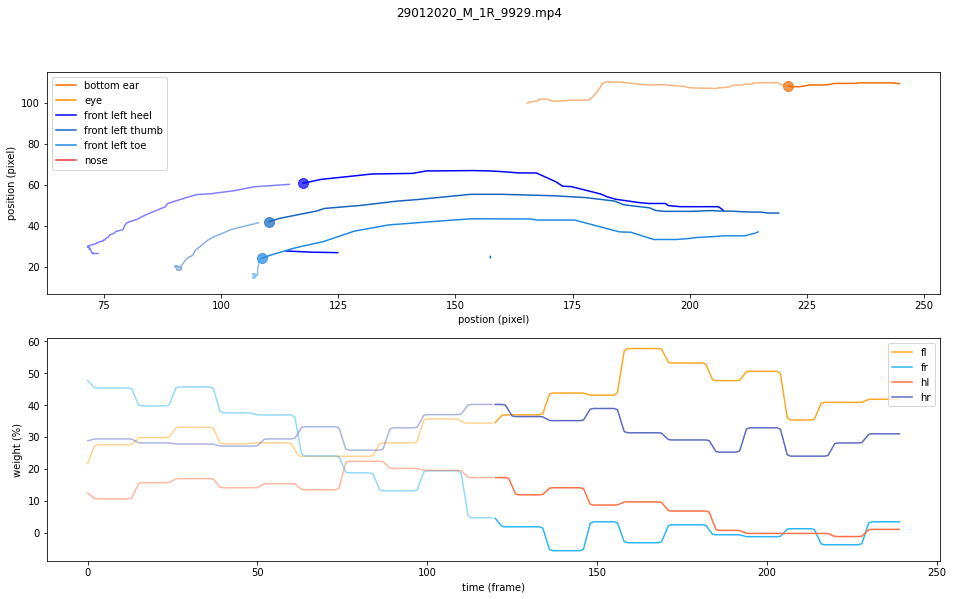

In [174]:
trial = list(dlc_data.keys())[2]
dataentry = data.loc[data.dlc_vidname == trial].iloc[0]

bps = [b for b in dlc_data[trial].keys() if "hind" not in b and "tail" not in b and "right" not in b]

f, axes = plt.subplots(2, 1, figsize=(16, 9))

for bp in bps:
    axes[0].plot(dlc_data[trial][bp]["x"][:120], dlc_data[trial][bp]["y"][:120], alpha=.5, color=colors[bp])
    axes[0].scatter(dlc_data[trial][bp]["x"][120], dlc_data[trial][bp]["y"][120], alpha=.7, s=100, color=colors[bp])
    axes[0].plot(dlc_data[trial][bp]["x"][120:], dlc_data[trial][bp]["y"][120:], label=bp, color=colors[bp])

for paw in sensors:
    axes[1].plot(dataentry[paw][:120], alpha=.5, color=colors[paw])
    axes[1].plot(np.arange(120, 240), dataentry[paw][120:], label=paw, color=colors[paw])

f.suptitle(trial)
axes[0].legend()
axes[1].legend()

axes[0].set(xlabel="postion (pixel)", ylabel="position (pixel)")
axes[1].set(xlabel="time (frame)", ylabel="weight (%)")


## Movement analysis
For each trial and each body part compute the distance from the position at the first frame over time


In [215]:
bps = (
    "front left heel", "front left toe", "front left thumb",
    "eye", "bottom ear"
)

def dist(trial, bp):
    trace = np.vstack(
        [trial[bp]["x"], trial[bp]["y"]]
    ).T

    # find first frame in which each entry in trace is not nan
    first_frame = np.argmin(np.sum(np.isnan(trace), axis=1))

    return np.sqrt(np.sum((trace - trace[first_frame])**2, axis=1))
    

def paw_angle(trial):
    heel = trial["front left heel"]
    toe = trial["front left toe"]

    deltax = heel["x"] - toe["x"]
    deltay = heel["y"] - toe["y"]
    return np.degrees(np.arctan2(deltax, deltay)) + 90


distances = {
    k:{
        bp:dist(v, bp) for bp in bps
    } for k,v in dlc_data.items()
}

paw_angles = {k: paw_angle(v) for k,v in dlc_data.items()}


Plot an example trial

In [237]:
# set plt font size
plt.rcParams.update({'font.size': 16})

<Figure size 1152x864 with 4 Axes>

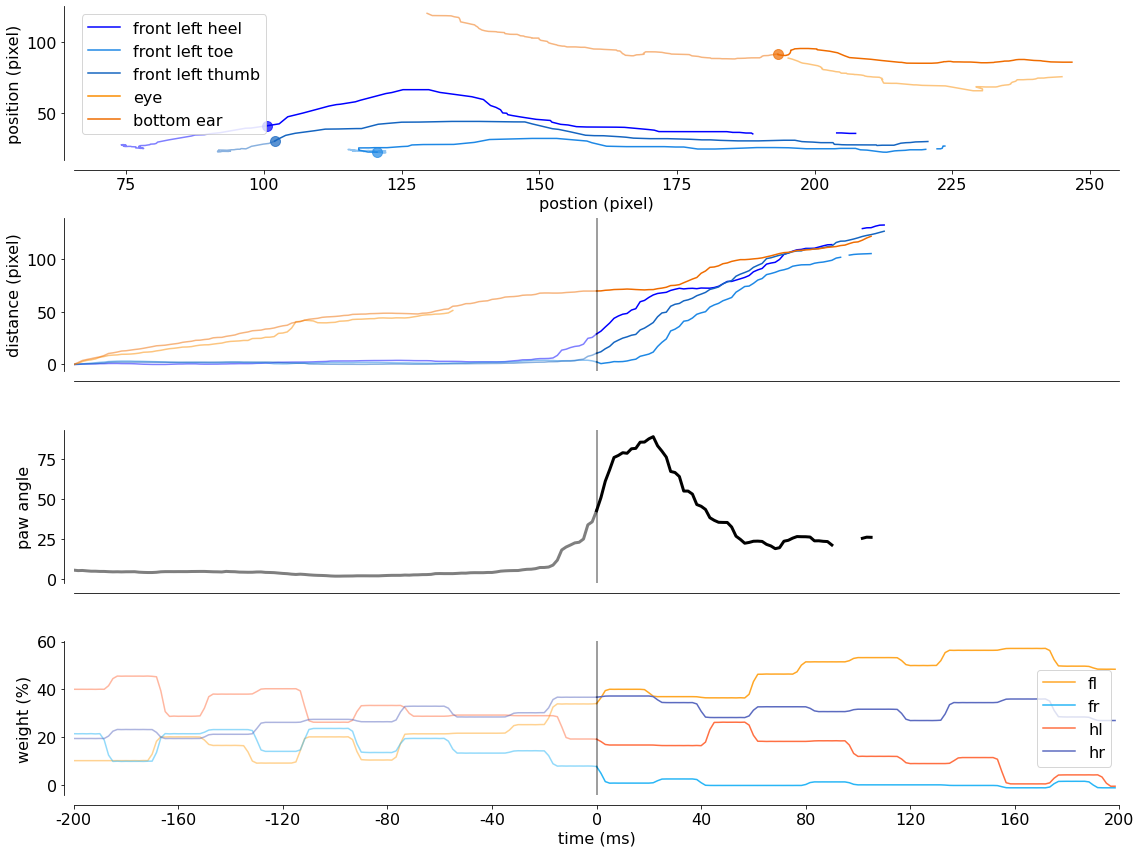

In [246]:
trial = list(dlc_data.keys())[4]
dataentry = data.loc[data.dlc_vidname == trial].iloc[0]
trial_distances = distances[trial]


f, axes = plt.subplots(4, 1, figsize=(16, 12))


t0 = np.arange(0, 121)
t1 = np.arange(120, 240)

for bp in bps:
    axes[0].plot(dlc_data[trial][bp]["x"][:121], dlc_data[trial][bp]["y"][:121], alpha=.5, color=colors[bp])
    axes[0].scatter(dlc_data[trial][bp]["x"][120], dlc_data[trial][bp]["y"][120], alpha=.7, s=100, color=colors[bp])
    axes[0].plot(dlc_data[trial][bp]["x"][120:], dlc_data[trial][bp]["y"][120:], label=bp, color=colors[bp])

    axes[1].plot(t0, trial_distances[bp][:121], alpha=.5, color=colors[bp])
    axes[1].plot(t1, trial_distances[bp][120:], label=bp, color=colors[bp])

axes[2].plot(t0, paw_angles[trial][:121], color="k", lw=3, alpha=.5)
axes[2].plot(t1, paw_angles[trial][120:], color="k", lw=3, label="paw angle")

for paw in sensors:
    axes[3].plot(t0, dataentry[paw][:121], alpha=.5, color=colors[paw])
    axes[3].plot(t1, dataentry[paw][120:], label=paw, color=colors[paw])

# f.suptitle(trial)
axes[0].legend()
axes[3].legend()

for ax in (1, 2, 3):
    axes[ax].axvline(120, color="k", alpha=.5)

axes[0].set(xlabel="postion (pixel)", ylabel="position (pixel)")
axes[1].set( ylabel="distance (pixel)", xticks=[], xlim=[0, 240])
axes[2].set( ylabel="paw angle", xticks=[], xlim=[0, 240])
axes[3].set(xlabel="time (ms)", ylabel="weight (%)", xticks=np.linspace(0, 240, 11), xticklabels=[round(x-200) for x in np.linspace(0, 240, 11) * 1000/600], xlim=[0, 240])

f.tight_layout()
clean_axes(f)

f.savefig("C:\\Users\\Federico\\Desktop\\forE\\dlc_example_trial.png", dpi=300)

## Plot averages

C:\Users\Federico\AppData\Local\Temp\ipykernel_10952\1277136331.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  avg_angle = np.nanmean(np.vstack(paw_angles.values()), axis=0)
C:\Users\Federico\AppData\Local\Temp\ipykernel_10952\1277136331.py:1: RuntimeWarning: Mean of empty slice
  avg_angle = np.nanmean(np.vstack(paw_angles.values()), axis=0)
C:\Users\Federico\AppData\Local\Temp\ipykernel_10952\1277136331.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  avg_angle_std = np.nanstd(np.vstack(paw_angles.values()), axis=0)
c:\Users\Federico\.conda\envs\glm\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for 

<Figure size 1152x648 with 1 Axes>

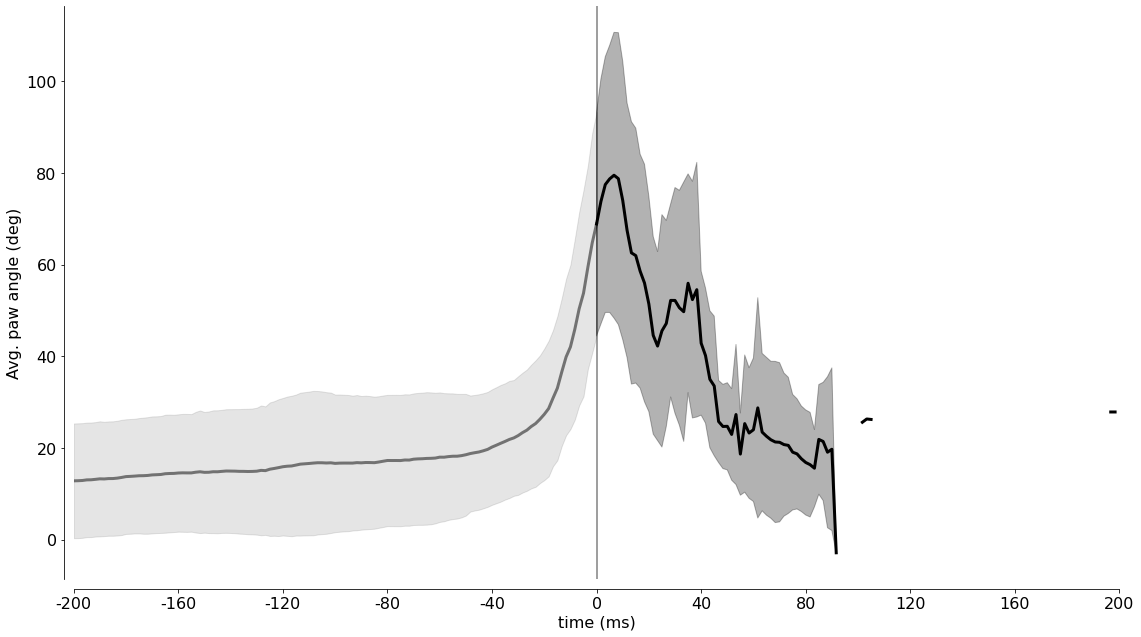

In [245]:
avg_angle = np.nanmean(np.vstack(paw_angles.values()), axis=0)
avg_angle_std = np.nanstd(np.vstack(paw_angles.values()), axis=0)

f, ax = plt.subplots(1, 1, figsize=(16, 9))

plot_mean_and_error(
    avg_angle[:121], avg_angle_std[:121], ax, err_alpha=.1, alpha=.5, x=t0, color="k"
)
plot_mean_and_error(
    avg_angle[120:], avg_angle_std[120:], ax, err_alpha=.3, alpha=1, x=t1, color="k"
)

ax.axvline(120, color="k", alpha=.5)
_ = ax.set(xlabel="time (ms)", ylabel="Avg. paw angle (deg)", xticks=np.linspace(0, 240, 11), xticklabels=[round(x-200) for x in np.linspace(0, 240, 11) * 1000/600], xlim=[0, 240])
f.tight_layout()
clean_axes(f)

# save figure
f.savefig("C:\\Users\\Federico\\Desktop\\forE\\dlc_analysis_avg_paw_angle", dpi=300)